1. age - Age of the patient
2. sex - Sex of the patient
3. cp - Chest pain type ~
    a) 0 = Typical Angina, 
    b) 1 = Atypical Angina, 
    c) 2 = Non-anginal Pain, 
    d) 3 = Asymptomatic
4. trtbps - Resting blood pressure (in mm Hg)
5. chol - Cholestoral in mg/dl fetched via BMI sensor
6. fbs - (fasting blood sugar > 120 mg/dl) ~ 
    a) 1 = True, 
    b) 0 = False
7. restecg - Resting electrocardiographic results ~ 
    a) 0 = Normal, 
    b) 1 = ST-T wave normality, 
    c) 2 = Left ventricular hypertrophy
8. thalachh - Maximum heart rate achieved
9. oldpeak - Previous peak
10. slp - Slope
11. caa - Number of major vessels
12. thall - Thalium Stress Test result ~ (0,3)
13. exng - Exercise induced angina ~ 
    a) 1 = Yes, 
    b) 0 = No
14. output - Target variable ~ 0 = less chance of heart attack; 1 = more chance of heart attack

## Perform EDA and predict if a person is prone to a heart attack or not.

In [20]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import cmasher as cm
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
uniques = {}
for i in df.columns:
    uniques['{0}'.format(i)] = int(sum(df[i].unique()))

undf = pd.DataFrame(uniques,index=["unique count"]).transpose()

In [7]:
undf

,unique count
age,2215
sex,1
cp,6
trtbps,6695
chol,38162
fbs,1
restecg,3
thalachh,13188
exng,1
oldpeak,87


In [8]:
# categorical vs continuous
conty = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
catty = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
target = ["output"]
print("The categorial cols are : ", catty)
print("The continuous cols are : ", conty)
print("The target variable is :  ", target)

The categorial cols are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
df[conty].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df[catty].describe().T

,count,mean,std,min,25%,50%,75%,max
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
slp,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
caa,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thall,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


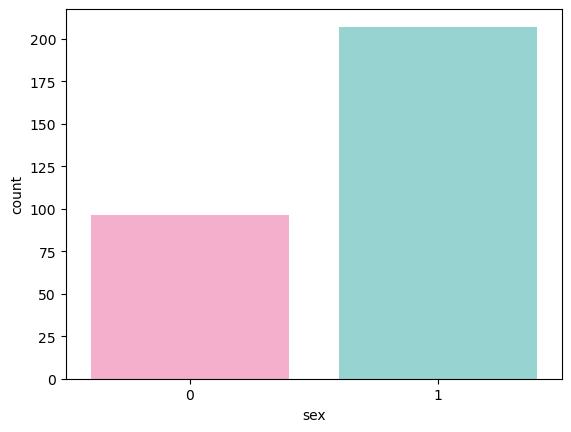

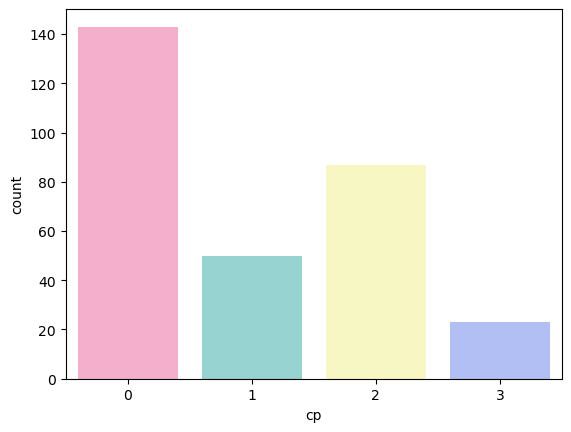

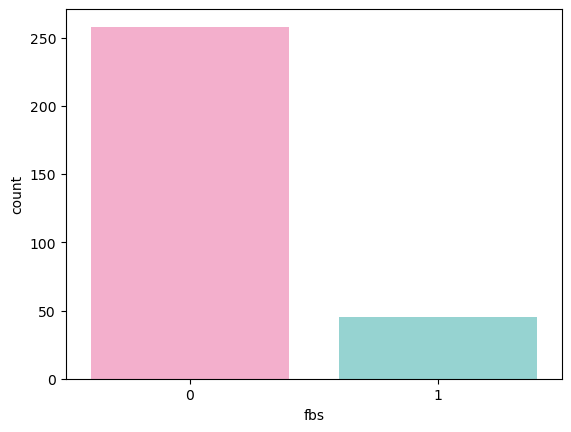

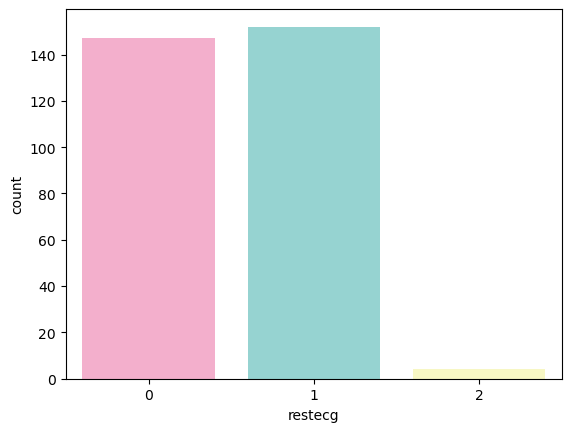

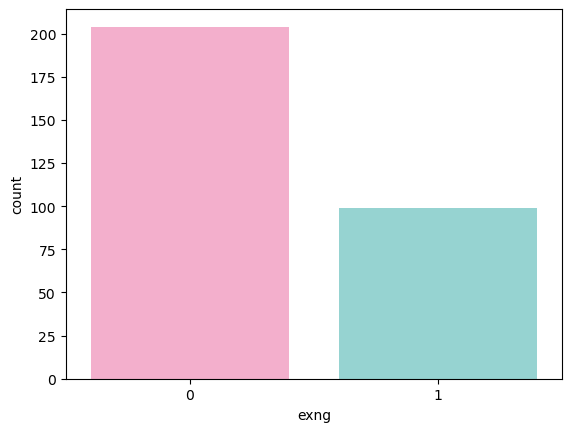

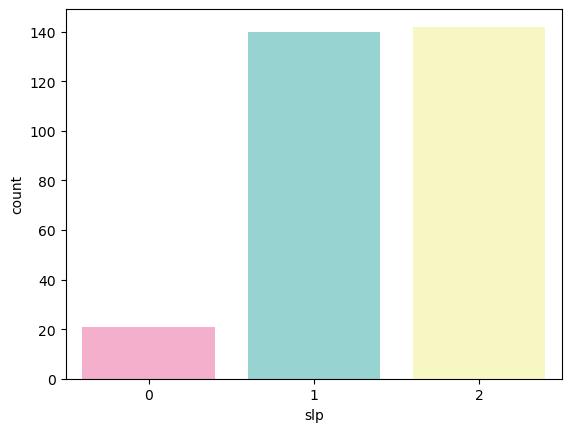

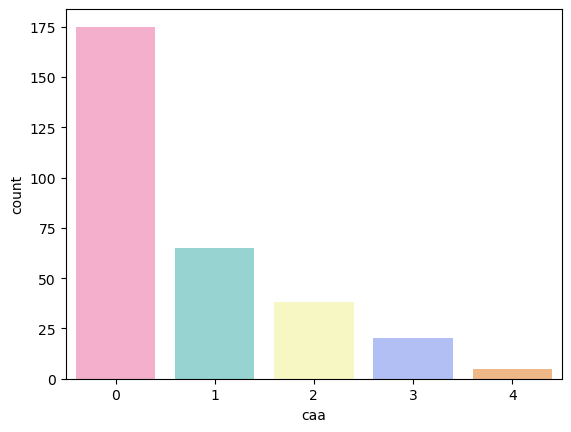

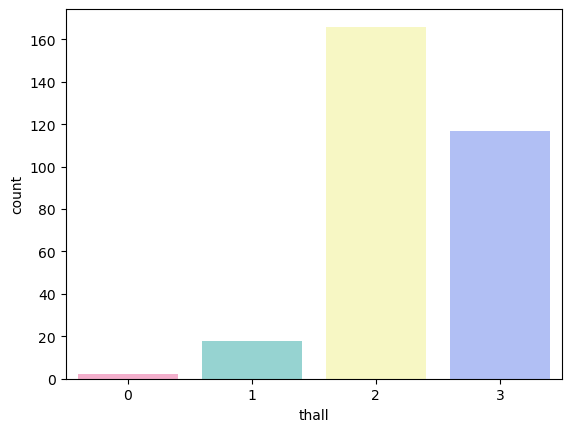

In [19]:
#sns.color_palette("pastel")
for i in catty:
    plt.figure()
    sns.countplot(df, x=i, label=i, palette=['#FFA3CB', '#8CDDDA', '#FFFFBC', '#A6B8FF', '#FFB875'])#"#bcbddc", "#efedf5"])

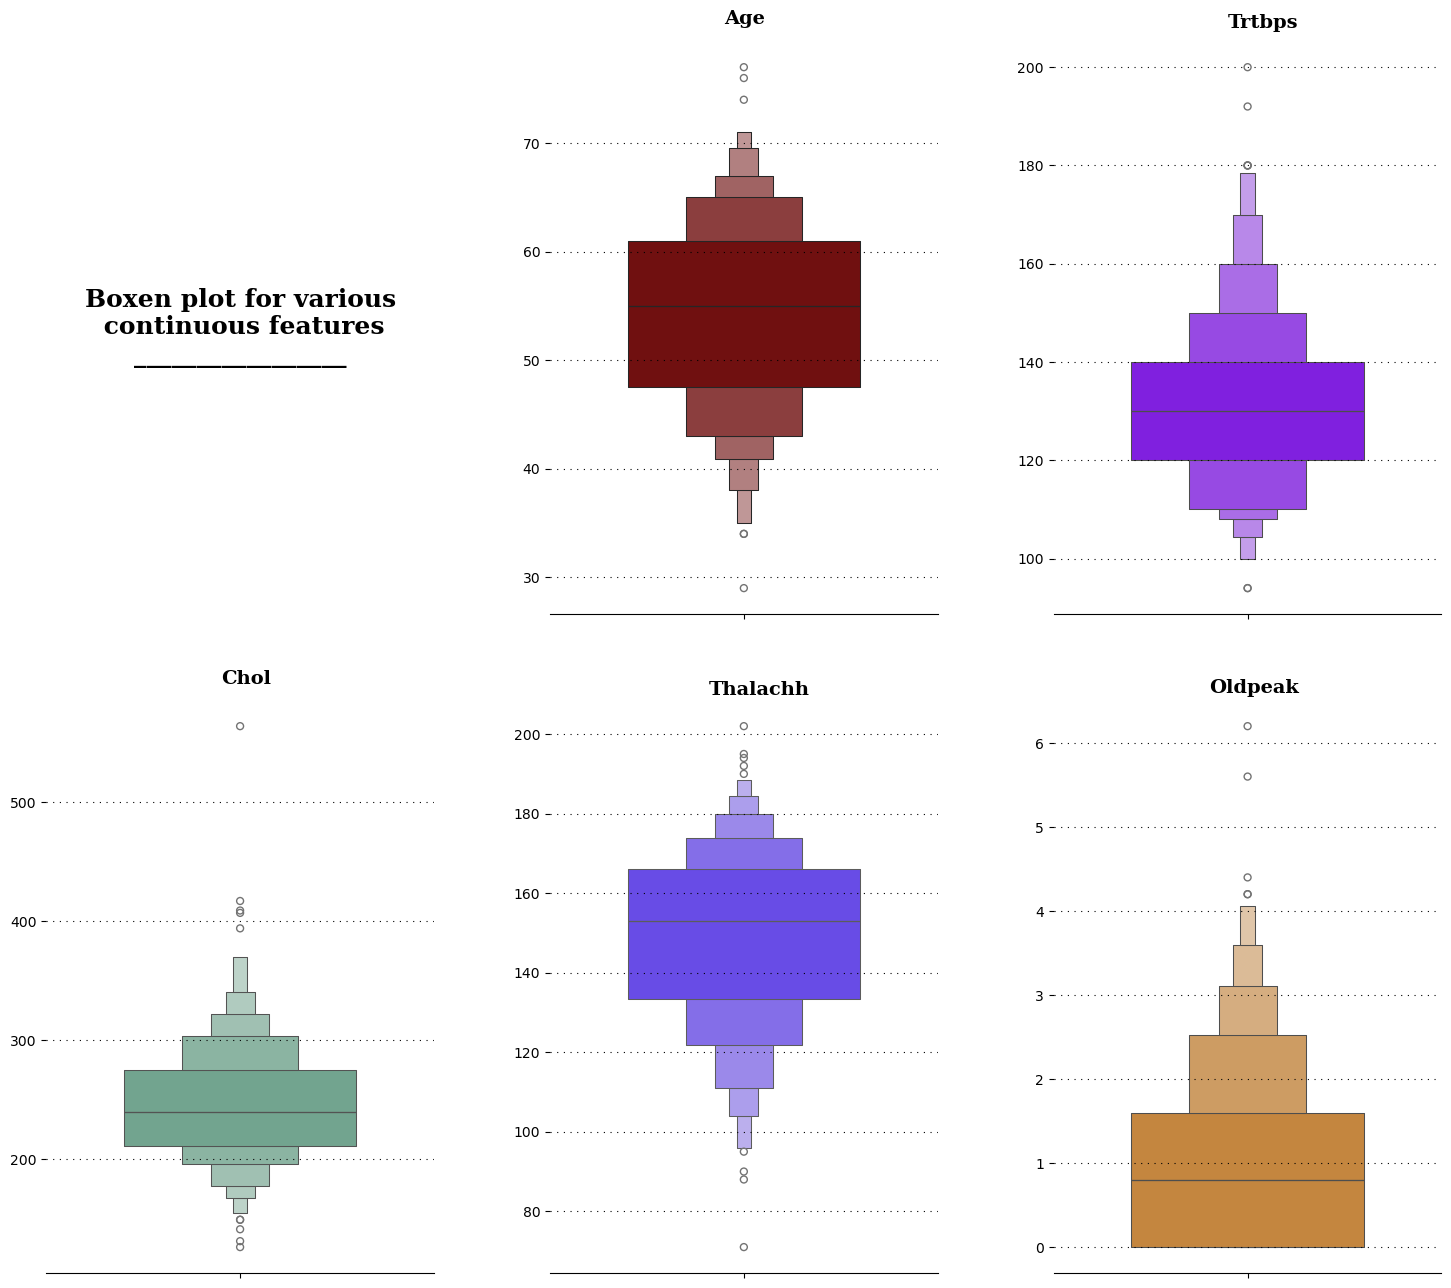

In [22]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

In [23]:
df_corr = df[conty].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<Axes: >

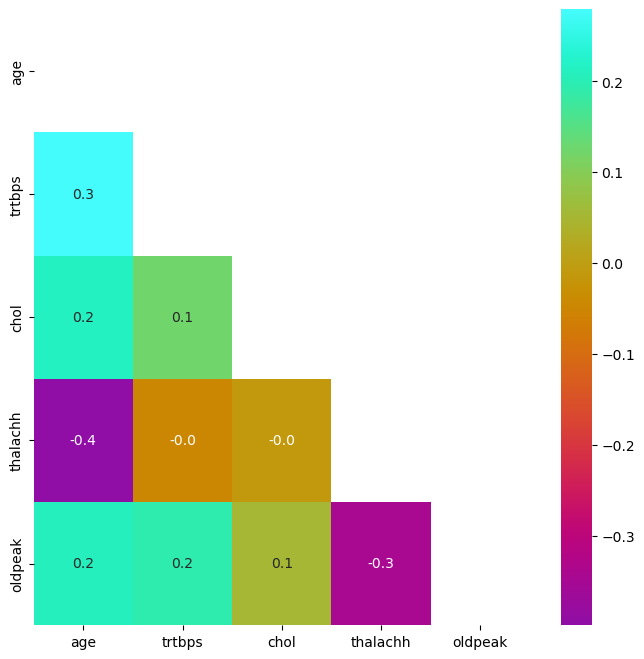

In [26]:
fig = plt.figure(figsize=(8,8))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap=cm.tropical)

In [19]:
# sns.pairplot(df.iloc[:,:4], hue="sex")

<Figure size 1000x1000 with 0 Axes>

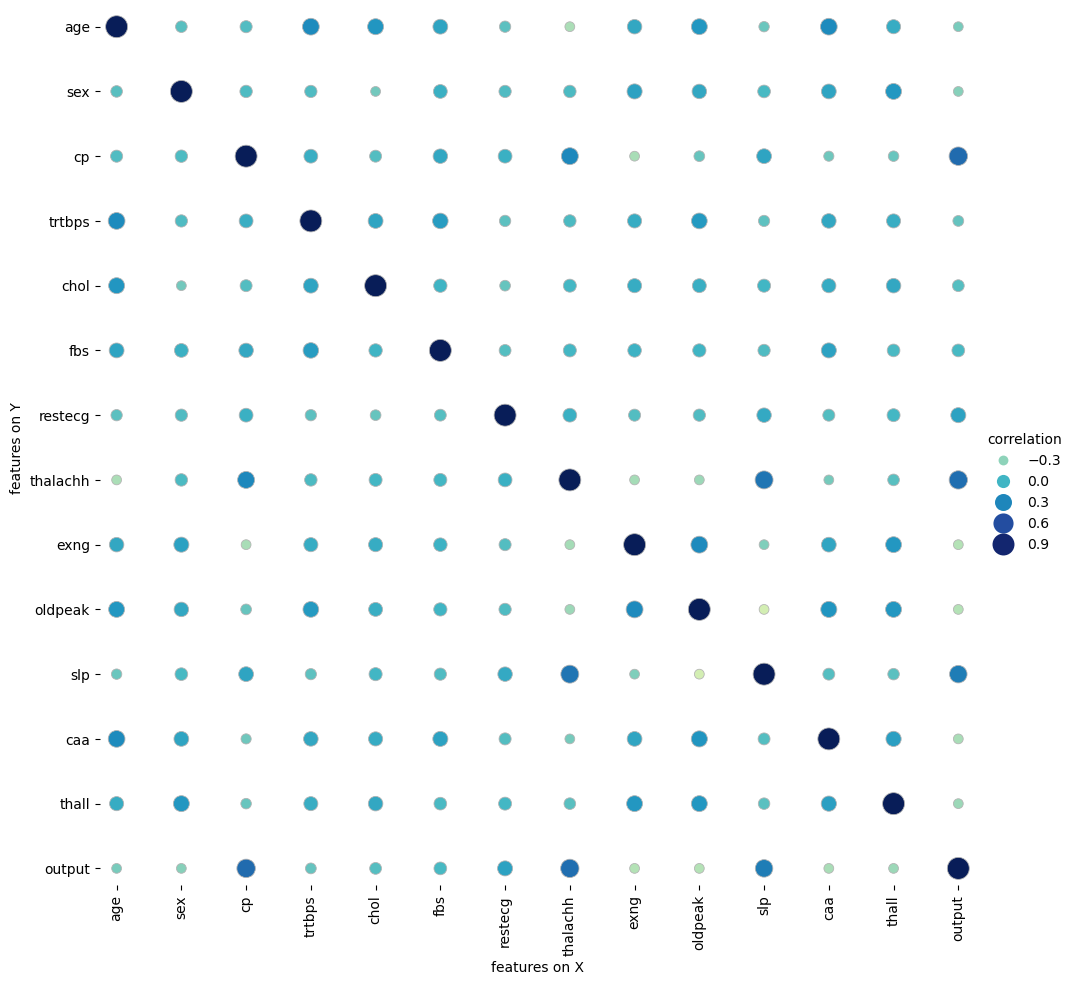

In [29]:
fig = plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
    color=cm.neon
)
g.set(xlabel="features on X", ylabel="features on Y", aspect="equal")
#g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
# for artist in g.legend.legendHandles:
#     artist.set_edgecolor(".7")
plt.show()

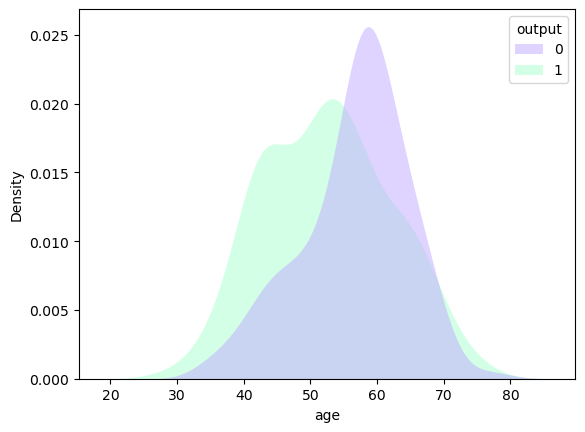

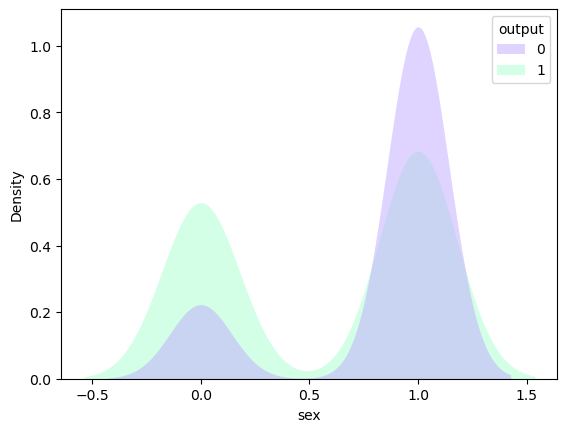

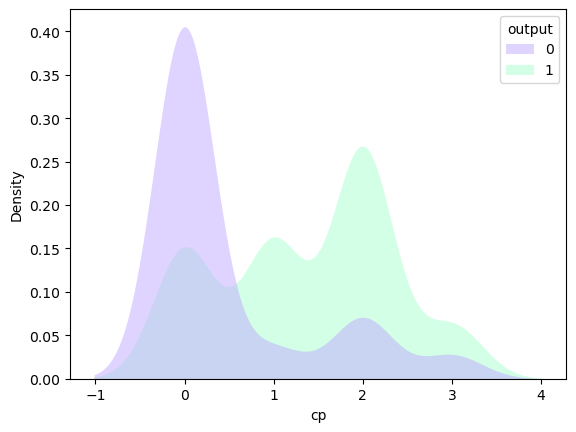

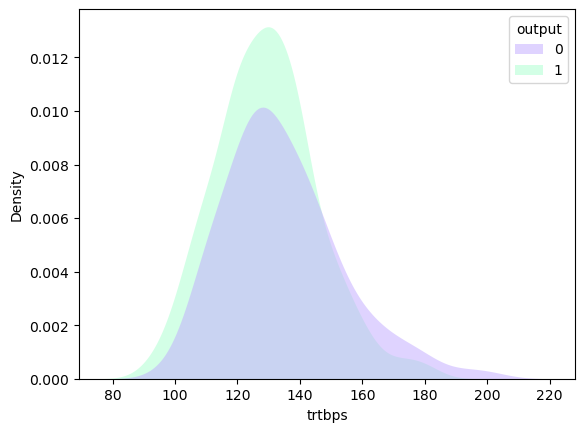

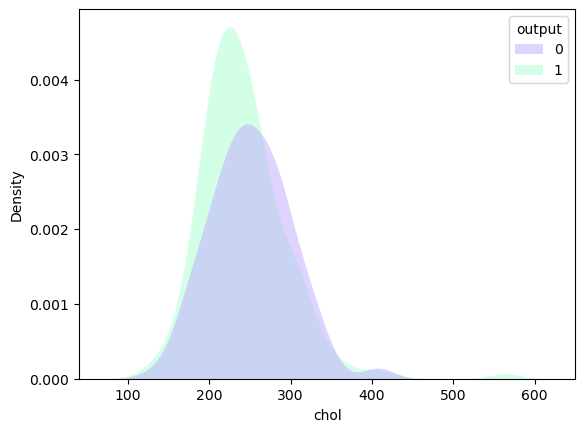

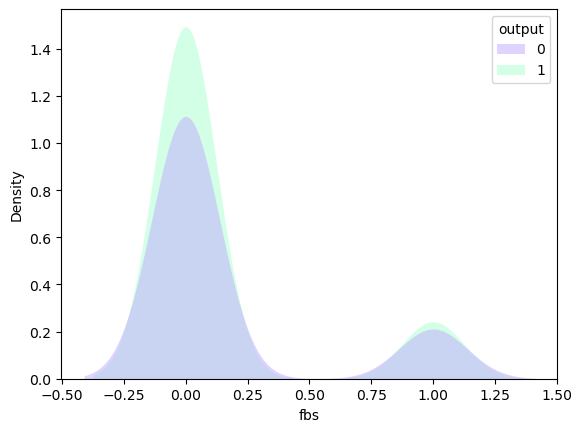

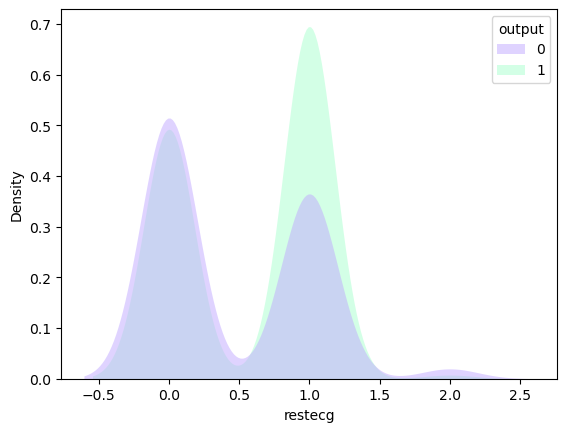

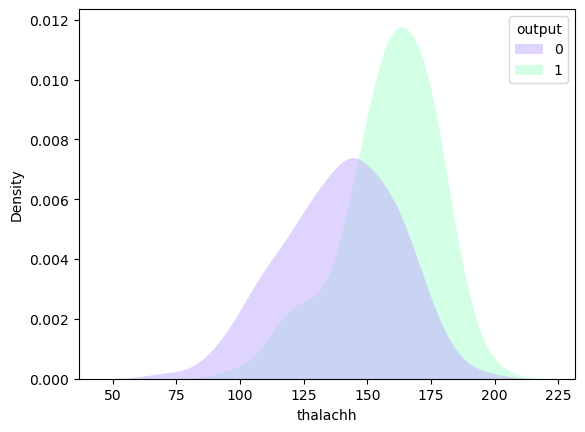

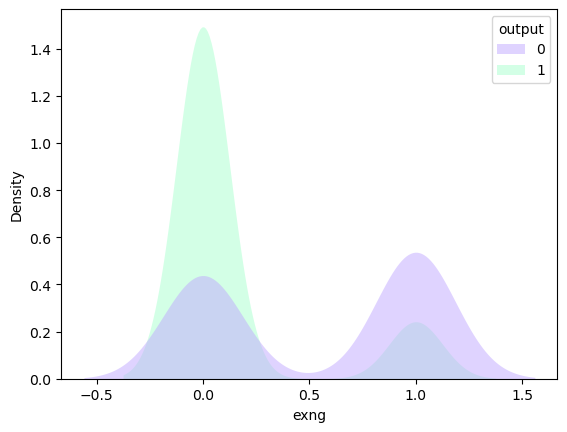

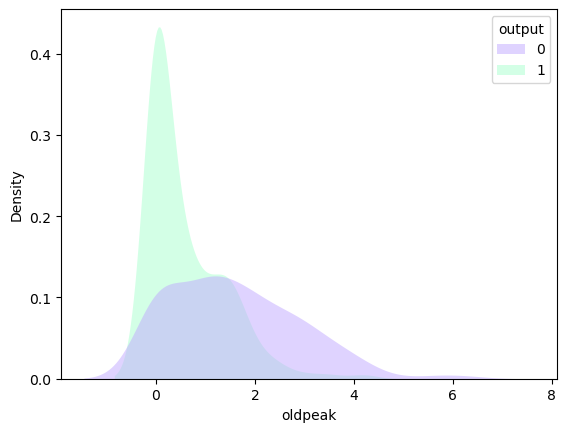

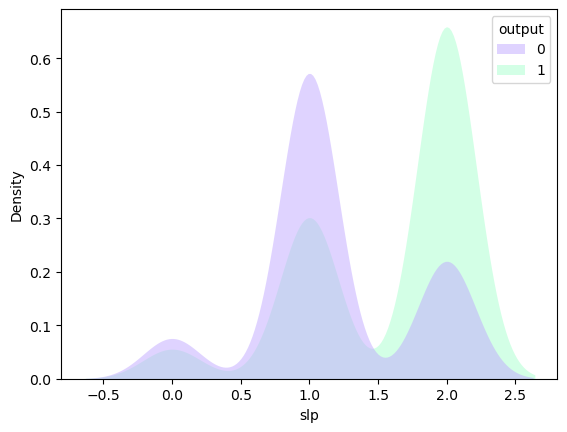

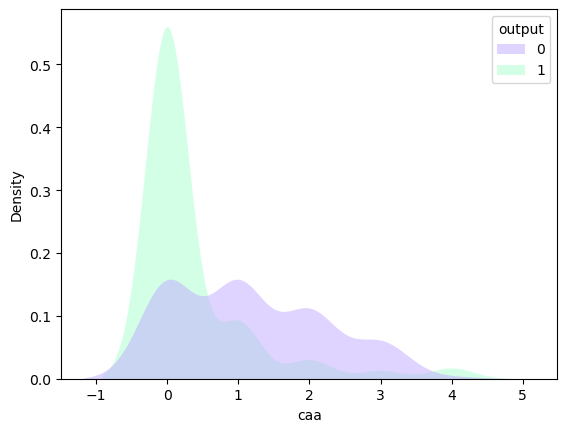

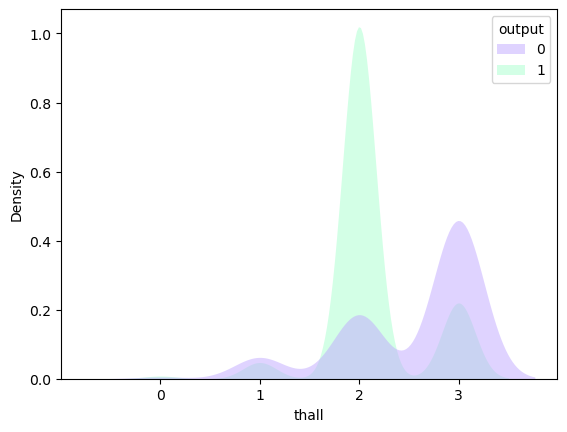

In [30]:
for i in df.columns:
    if i == 'output':
        continue
    plt.figure()
    sns.kdeplot(data=df, x=i,hue="output", fill=True,palette=["#C1A8FF","#A8FFCE"], alpha=.5, linewidth=0)

# EDA Conclusions

1. No NaN values are present in the dataset.
2. Strong correlation is observed between age and resting blood pressure (0.3), age and maximum heart rate reached (-0.4), and maximum heart rate achieves and old peak value (-0.3).
3. Some weaker correlation exists between output and maximum heart rate, chest pain, and slope.
4. Density plot suggests that age alone is a weak predictor of heart attack risk since a significant overlap is found between the two populations.
5. People with sex=1 are at a higher risk of heart attack, although it should be noted that the data has twice as many sex=1 people compared to sex=0.
6. People with typical anginal pain are at much lower risk of an attack compared to people with non-anginal type pain.
7. People with higher max heart rate achieved have higher chances of a heart attack.
8. People without exercise induced angina have higher risk.
9. Density plot shows that people with lower old peak values show high risk of an attack, compared to people with higher peak values.
10. Number of major vessels = 0 population are shown to be in the high risk population.
11. People with higher Thallium stress values are at low risk of an attack, compared to people with lower stress values.
12. An overlap is observed between the two populations in the cholestrol density plot. However, on a closer look, for people with cholestrol levels >500 mg/dl have higher chances of a heart attack.
13. Variables slp, fbs, restecg, trtbps have significant overlap between both populations, and therefore are weak predictors.